# Title: Heart Disease Prediction
`Author` : [Rohit jangid](https://github.com/rohitjanggid)\
`Date` : 25.july.2025\
`Dataset` : [Heart Disease UCI](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data)

## Meta-Data (About Dataset)
## Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### Content
#### Column Descriptions:
* `id` (Unique id for each patient)
* `age` (Age of the patient in years)
* `origin` (place of study)
* `sex` (Male/Female)
* `cp` chest pain type 
  1. typical angina, 
  2. atypical angina, 
  3. non-anginal, 
  4. asymptomatic
* `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* `chol` (serum cholesterol in mg/dl)
* `fbs` (if fasting blood sugar > 120 mg/dl)
* `restecg` (resting electrocardiographic results)
* -- `Values`: [normal, stt abnormality, lv hypertrophy]
* `thalach`: maximum heart rate achieved
* `exang`: exercise-induced angina (True/ False)
* `oldpeak`: ST depression induced by exercise relative to rest
* `slope`: the slope of the peak exercise ST segment
* `ca`: number of major vessels (0-3) colored by fluoroscopy
* `thal`: [normal; fixed defect; reversible defect]
* `num`: the predicted attribute

### Acknowledgements
#### Creators:
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
#### Relevant Papers:
* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310. 
* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." 
* Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.
#### Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. 

**They would be:**

* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

## Aims and Objective:

We will fill this after doing some exploratory Data Analyis (EDA).

### Import Libraries

Let's start the project by impoprting all the libraries that we will need in this project.


In [190]:
# import libraries

# To handle the data
import pandas as pd
import numpy as np
# To visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# To perprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# For classification task
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, mean_absolute_error, mean_squared_error

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [191]:
df = pd.read_csv('heart_disease_uci.csv')

# print first 5 rows
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Exploratory Data Analysis (EDA)

## Explore Each Column

In [192]:
# exploring the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [193]:
df.shape

(920, 16)

In [194]:
# id column
df['id'].min(), df['id'].max()

(1, 920)

In [195]:
# age collumn
df['age'].min(), df['age'].max()

(28, 77)

In [196]:
# let's summrize the age column
df['age'].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

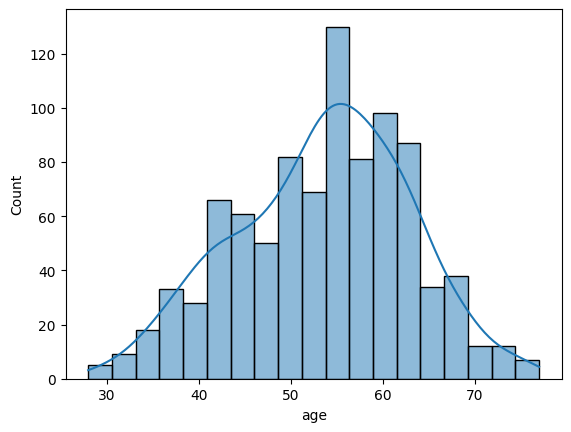

In [197]:
# draw the histogram to see the distribution of age column
sns.histplot(df['age'], kde=True)

Mean: 53.51086956521739
Median: 54.0
Mode: 54


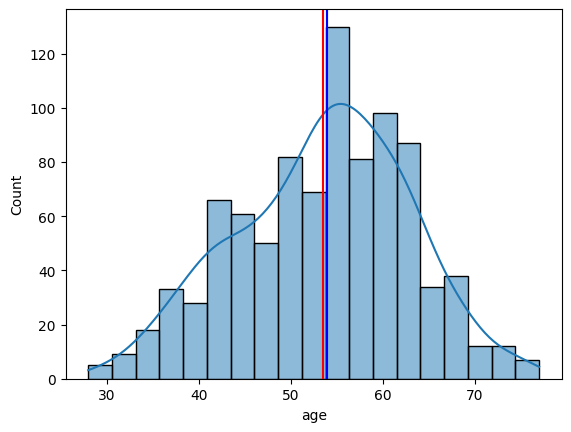

In [198]:
# plot the mean, median and mode of age column using sns
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color = 'red')
plt.axvline(df['age'].median(), color = 'green')
plt.axvline(df['age'].mode()[0], color = 'blue')

# print the value of mean, median and mode of age column
print('Mean:', df['age'].mean())
print('Median:', df['age'].median())
print('Mode:', df['age'].mode()[0])

Let's explore the gender based distibution of the dataset for age column

In [199]:
# plot the histogram using plotly 
fig = px.histogram(df, x='age', color='sex')
fig

In [200]:
# find the values of sex column
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [201]:
# calculate the percentages male and female value counts in the data
male_count = df['sex'].value_counts().get('Male', 0)
female_count = df['sex'].value_counts().get('Female', 0)
male_percentage = male_count / len(df) * 100
female_percentage = female_count / len(df) * 100
print(f'Male Percentage in the data:{male_percentage: .2f}%')
print(f'Female Percentage in the data:{female_percentage: .2f}%')

# difference
diffrence_percentage = ((male_count - female_count) / female_count) * 100 if female_count != 0 else float('inf')
print(f"Male are {diffrence_percentage: .2f}% More than female in the data.")

Male Percentage in the data: 78.91%
Female Percentage in the data: 21.09%
Male are  274.23% More than female in the data.


In [202]:
# find the value count of age column grouping by sex column
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

In [203]:
# lets deal with dataset column
# find the unique values in dataset column
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [204]:
# find unique value count in dataset column
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [205]:
# find the countplot of dataset column
# sns.countplot(data =df, x='dataset', hue='sex')

# using plotly
fig = px.bar(df, x='dataset', color='sex')
fig.show()

# print the value count of column dataset grouped by sex
df.groupby('sex')['dataset'].value_counts()

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64

In [206]:
# make a plot of age column using plotly and coloring this by dataset column
fig = px.histogram(data_frame=df, x='age', color='dataset')
fig.show()
# print the mean, median, mode of age cloumn grouped by dataset column
print('Mean of age grouped by dataset:\n',df.groupby('dataset')['age'].mean())
print('---------------------------')
print('Median of age grouped by dataset:\n',df.groupby('dataset')['age'].median())
print('---------------------------')
print('Mode of age grouped by dataset:\n',df.groupby('dataset')['age'].agg(pd.Series.mode))

Mean of age grouped by dataset:
 dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
---------------------------
Median of age grouped by dataset:
 dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
---------------------------
Mode of age grouped by dataset:
 dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object


#### Let's explore cp(Chest Pain) column

In [207]:
# value count of cp column
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

In [208]:
496+204+174+46

920

<Axes: xlabel='cp', ylabel='count'>

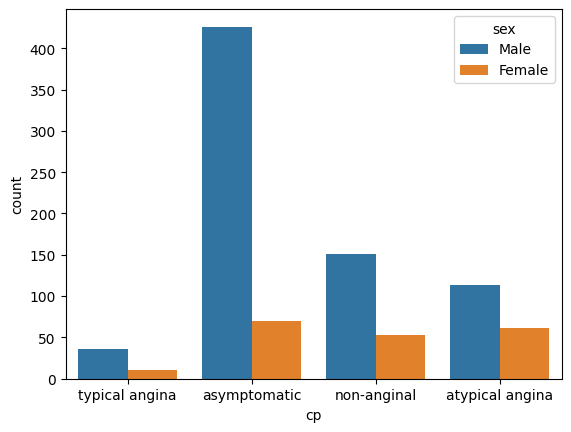

In [209]:
# count plot of cp column by sex column
sns.countplot(data=df, x='cp', hue='sex')

<Axes: xlabel='cp', ylabel='count'>

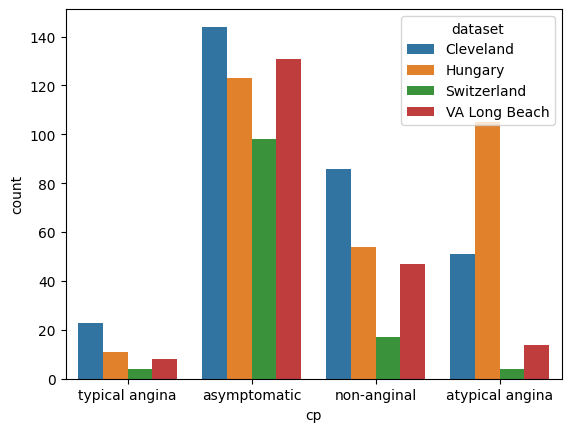

In [210]:
# count plot of cp column by dataset column
sns.countplot(data=df, x='cp', hue='dataset')

In [211]:
# draw the plot of age column grouped by cp column
fig = px.histogram(df, x='age', color='cp')
fig.show()

#### Let's explore the trestbps (resting blood pressure) column:

The normal resting blood pressure is 120/80 mm Hg.

In [212]:
# let's summrize the trestbps column
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

<Axes: xlabel='trestbps', ylabel='Count'>

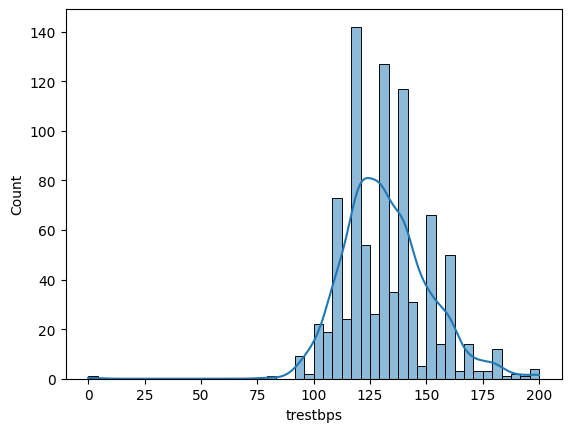

In [213]:
sns.histplot(df['trestbps'], kde=True)

---

<span style= "color: yellow; font-size: 250%; font-weight: bold;">Dealing with missing values</span>

We are going to make a function to deal with missing values.

In [214]:
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [215]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [216]:
# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("MSE =", mean_squared_error(y_test, y_pred), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [217]:
# check the missing value in the column
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
dtype: int64

In [218]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.41%
MAE = 13.330809248554914 

MSE = 296.05008034682083 

R2 = 0.07563609101129076 

Missing Values chol : 3.26%
MAE = 44.903202247191004 

MSE = 4057.837628651685 

R2 = 0.678550088464869 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 79.52 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 64.67 accuracy

Missing Values thalch : 5.98%
MAE = 16.583468208092484 

MSE = 458.5458289017341 

R2 = 0.3332361265849819 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 79.77 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.559517441860465 

MSE = 0.6217630290697673 

R2 = 0.4076439336134382 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 68.29 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 70.97 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 72.41 accuracy



<span style= "color: yellow; font-size: 250%; font-weight: bold;">Dealing with Outliers</span>

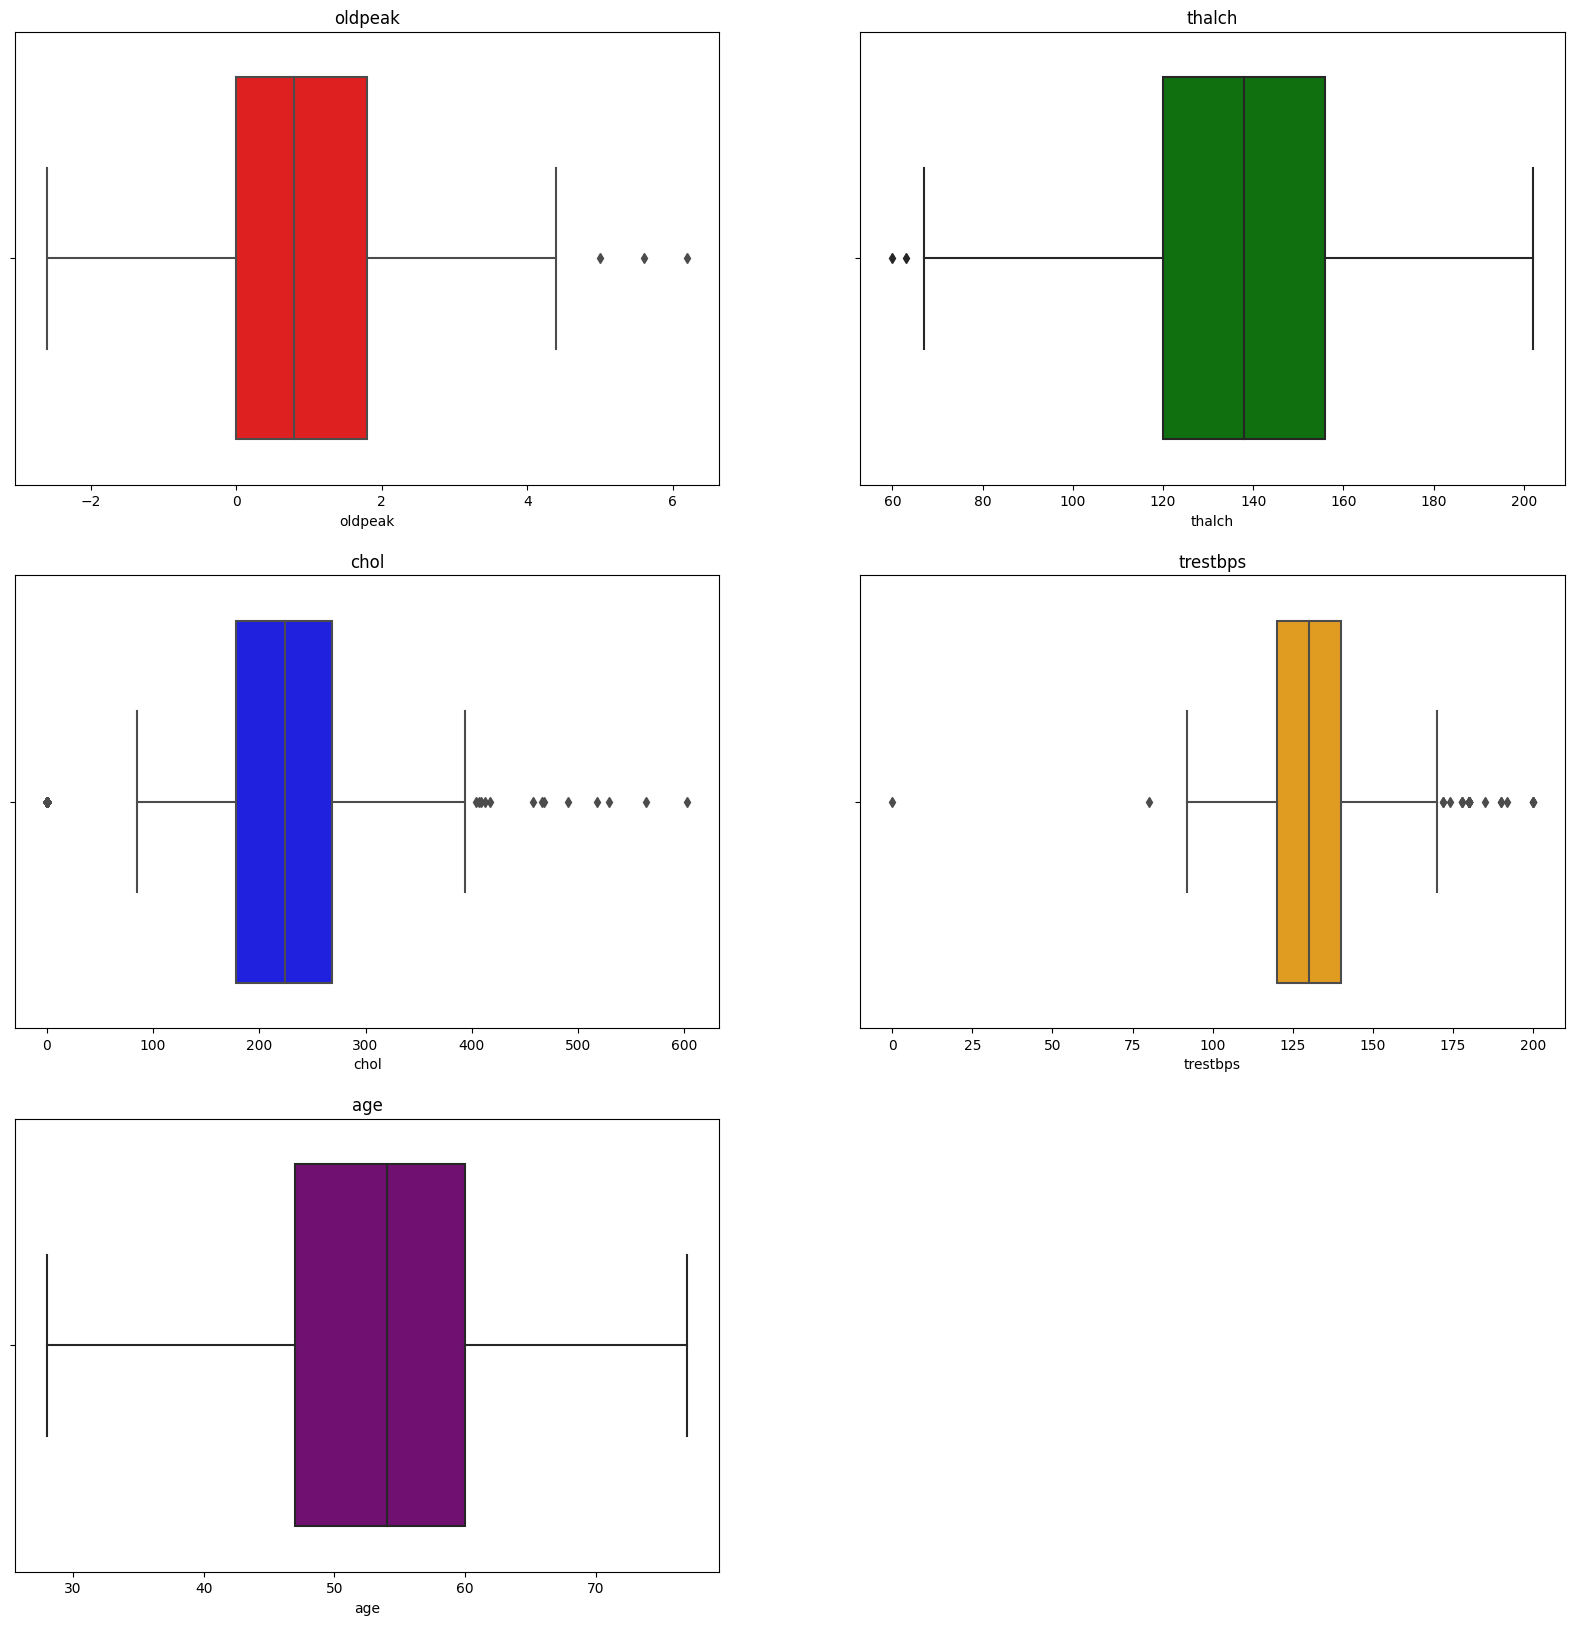

In [219]:
# Create box plot of all numaric columns using for loop and subplot
plt.figure(figsize=(20, 20))

colors = ['red', 'green', 'blue', 'orange', 'purple']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x= df[col], color=colors[i])
    plt.title(col)

plt.show()


In [220]:
# Create box plot of all numeric columns using plotly
import plotly.graph_objs as go

fig = go.Figure()

for col, color in zip(numeric_cols, colors):
    fig.add_trace(go.Box(y=df[col], name=col, marker_color=color, boxmean='sd'))

fig.update_layout(title="Boxplot of Numeric Columns", yaxis_title="Value")
fig.show()


In [221]:
# print the row from df where trestbps value is 0
df[df['trestbps'] == 0]

# remove this row from data
df = df[df['trestbps'] != 0]

---
<span style= "color: yellow; font-size: 250%; font-weight: bold;">Machine Learning</span>

In [222]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [223]:
df['num'].value_counts()

num
0    411
1    265
2    109
3    106
4     28
Name: count, dtype: int64

The target column is `num` which is the predicted attribute. we will use this column to predict the heart disease.

The unique value in this column are : [0,1,2,3,4], Which states that there are 5 types of heart diseases.

* 0 = no heart disease
* 1 = mild heart disease
* 2 = moderate heart disease
* 3 = severe heart disease
* 4 = critical heart disease

In [224]:
# split the data into X and y
X = df.drop('num', axis=1)
y = df['num']

# encode X data with separate encoders for each column
encoders = {}
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype.name == 'category':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        encoders[col] = le

# split the data into train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Enlist all the models that you will use to predict the heart disease. These models should be classifiers for multi-class classification.

1. logistic regression
2. KNN
3. NB
4. SVM
5. Decision Tree
6. Random Forest
7. XGBoost
8. GradientBoost
9. AdaBoost
10. lightGBM

In [225]:
# import all models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB

# import pipline
from sklearn.pipeline import Pipeline
# import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

In [226]:
# Create a list of model to evaluate
models = {
    ('RandomForestClassifier', RandomForestClassifier(random_state=42)),
    ('GradientBoostingClassifier', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Ada Boost', AdaBoostClassifier(random_state=42)),
    ('XG Boost', XGBClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB())
}

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name,model in models:
    # create a pipline for each model
    pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy='most_frequent')),
        # ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ('model', model)
    ])

    # perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train,cv=5)

    # Calculate mean accuracy
    mean_accuracy = scores.mean()

    # fit the pipline in training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the training data 
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy score
    acc_score = accuracy_score(y_test, y_pred)

    # print the performance matrics
    print('Model:', name)
    print('Cross-validation Accuracy:', mean_accuracy)
    print('Test Accuracy:', acc_score)
    print()

    # check if the current model has the best accuracy
    if acc_score > best_accuracy:
        best_accuracy = acc_score
        best_model = pipeline

# Retrive the best model
print('Best model:', best_model)

# save the best model
import pickle
pickle.dump(best_model, open('heart_disease_model.pkl', 'wb'))

Model: Decision Tree
Cross-validation Accuracy: 0.6081758720930232
Test Accuracy: 0.6268115942028986

Model: K-Nearest Neighbors
Cross-validation Accuracy: 0.5785610465116279
Test Accuracy: 0.6014492753623188

Model: Naive Bayes
Cross-validation Accuracy: 0.5817587209302325
Test Accuracy: 0.5579710144927537

Model: GradientBoostingClassifier
Cross-validation Accuracy: 0.654796511627907
Test Accuracy: 0.6630434782608695

Model: Logistic Regression
Cross-validation Accuracy: 0.5131661821705427
Test Accuracy: 0.5072463768115942

Model: Support Vector Machine
Cross-validation Accuracy: 0.5770106589147287
Test Accuracy: 0.5869565217391305

Model: Ada Boost
Cross-validation Accuracy: 0.6469961240310077
Test Accuracy: 0.6739130434782609

Model: XG Boost
Cross-validation Accuracy: 0.6671875
Test Accuracy: 0.6413043478260869

Model: RandomForestClassifier
Cross-validation Accuracy: 0.6625968992248061
Test Accuracy: 0.6630434782608695

Best model: Pipeline(steps=[('model', AdaBoostClassifier(ran

#### Outputs:
1. The minimum age to have a heart disease start from `28` year old.
2. Most of the people get the heart disease at the age of `53-54` years.
3. Most of the male and female get are the heart disease at the age of 54-55 years.
4. Male Percentage in the data: `78.91%`
5. Female Percentage in the data: `21.09%`
6. Male are  `274.23%` More than female in the data.
7. We have highest number of people from Cleveland `304` and lowest from Switzerland `123`.
   1. The heigst numbers of female in this dataset are from Cleveland `97` and lowest from VA long Beach `6`
   2. The heigst numbers of male in this dataset are from Hungary `212` and lowest from Switzeland `113`
8. `Write down the observations here about mean, median and mode of age column, grouped by dataset column.`
9. `Write down the observation from cp column here.`
10. `Write down the steps of Imputing missingvalues and why did you choose those steps?`
11. `How did you deal with outliers, write the information Step by Step.`
12. `Explore all other columns and write their outputs.`
13. `write down the observations from model output.`